## EDA (Exploratory Data Analysis)

#### Import Libraries & Load Preprocessed Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## load cleaned dataset

df = pd.read_csv(r"D:\Hip-Replacement-EffiCare\cleaned_hip_replacement_data.csv")

In [3]:
df.head(3)

,operating_certificate_number,facility_id,zip_code_3_digits,length_of_stay,type_of_admission,patient_disposition,discharge_year,ccs_diagnosis_code,ccs_diagnosis_description,ccs_procedure_code,...,health_service_area_finger lakes,health_service_area_hudson valley,health_service_area_long island,health_service_area_new york city,health_service_area_southern tier,health_service_area_western ny,age_group_18 to 29,age_group_30 to 49,age_group_50 to 69,age_group_70 or older
0,228000,39,148,4.5,elective,hosp basd medicare approved swing bed,2016,203,osteoarthritis,153,...,False,False,False,False,False,True,False,False,False,True
1,228000,39,148,4.0,elective,home or self care,2016,203,osteoarthritis,153,...,False,False,False,False,False,True,False,False,True,False
2,228000,39,147,3.0,elective,home or self care,2016,203,osteoarthritis,153,...,False,False,False,False,False,True,False,False,True,False


#### Basic Exploration

In [4]:
df.shape

(26594, 242)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26594 entries, 0 to 26593
Columns: 242 entries, operating_certificate_number to age_group_70 or older
dtypes: bool(216), float64(5), int64(11), object(10)
memory usage: 10.8+ MB


In [6]:
df.describe()

,operating_certificate_number,facility_id,length_of_stay,discharge_year,ccs_diagnosis_code,ccs_procedure_code,apr_drg_code,apr_mdc_code,apr_severity_of_illness_code,attending_provider_license_number,operating_provider_license_number,total_charges,total_costs,charge_to_cost_ratio,efficiency_index,apr_severity_encode
count,2.659400e+04,26594.000000,26594.000000,26594.0,26594.000000,26594.000000,26594.0,26594.0,26594.000000,2.659400e+04,2.659400e+04,26594.000000,26594.000000,26594.000000,26594.000000,26594.000000
mean,4.460325e+06,903.070053,2.461175,2016.0,205.155110,153.157216,301.0,8.0,1.607054,5.101175e+05,4.737466e+05,57650.897837,20987.197569,2.817149,0.000136,1.607054
std,2.394598e+06,583.956335,1.027224,0.0,11.185498,2.895358,0.0,0.0,0.591931,5.099107e+06,4.862939e+06,30166.569929,13307.446913,0.838620,0.000334,0.591931
min,1.010000e+05,1.000000,1.000000,2016.0,1.000000,58.000000,301.0,8.0,1.000000,4.125000e+03,9.238200e+04,321.000000,64.450000,0.190877,0.000007,1.000000
25%,2.701003e+06,411.000000,2.000000,2016.0,203.000000,153.000000,301.0,8.0,1.000000,1.702540e+05,1.702540e+05,32204.585000,13611.787500,2.287181,0.000088,1.000000
50%,4.601001e+06,829.000000,2.000000,2016.0,203.000000,153.000000,301.0,8.0,2.000000,2.069400e+05,2.069400e+05,51675.905000,18608.255000,2.754183,0.000122,2.000000
75%,7.002012e+06,1447.000000,3.000000,2016.0,203.000000,153.000000,301.0,8.0,2.000000,2.473050e+05,2.451360e+05,71873.372500,24114.280000,3.208556,0.000171,2.000000
max,7.004010e+06,3376.000000,4.500000,2016.0,238.000000,231.000000,301.0,8.0,4.000000,9.033265e+07,9.063684e+07,131376.553750,688280.050000,7.106284,0.051247,4.000000


In [7]:
df.isnull().sum()

operating_certificate_number      0
facility_id                       0
zip_code_3_digits                 0
length_of_stay                    0
type_of_admission                 0
                                 ..
health_service_area_western ny    0
age_group_18 to 29                0
age_group_30 to 49                0
age_group_50 to 69                0
age_group_70 or older             0
Length: 242, dtype: int64

#### Univariate Analysis (Single Feature Analysis)

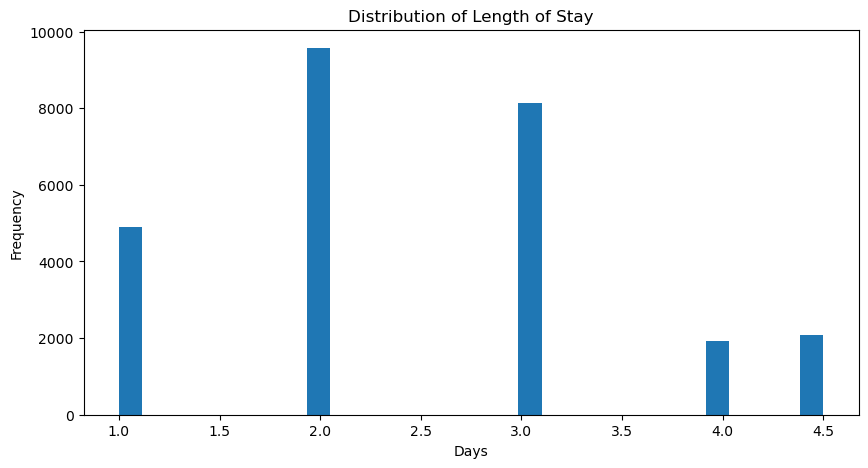

In [14]:
## Distribution of Length of Stay

plt.figure(figsize=(10,5))
plt.hist(df["length_of_stay"], bins=30)
plt.title("Distribution of Length of Stay")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

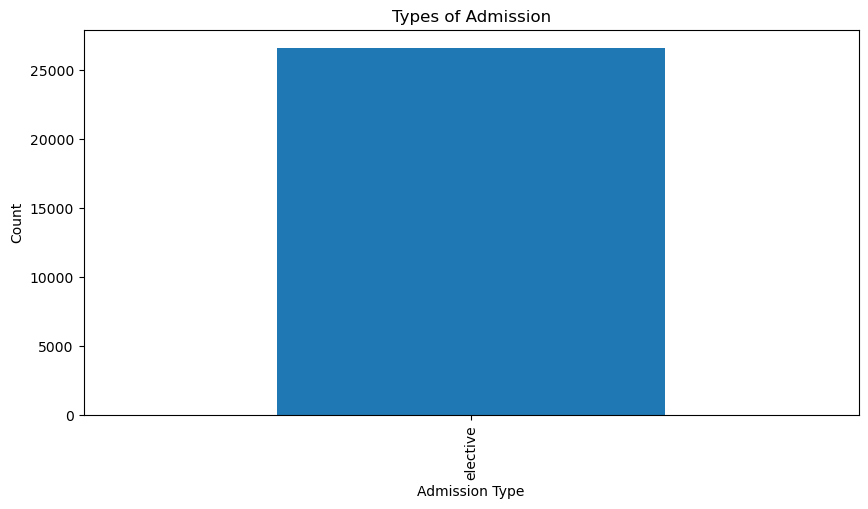

In [15]:
## Admission Type Counts

plt.figure(figsize=(10,5))
df["type_of_admission"].value_counts().plot(kind="bar")
plt.title("Types of Admission")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.show()

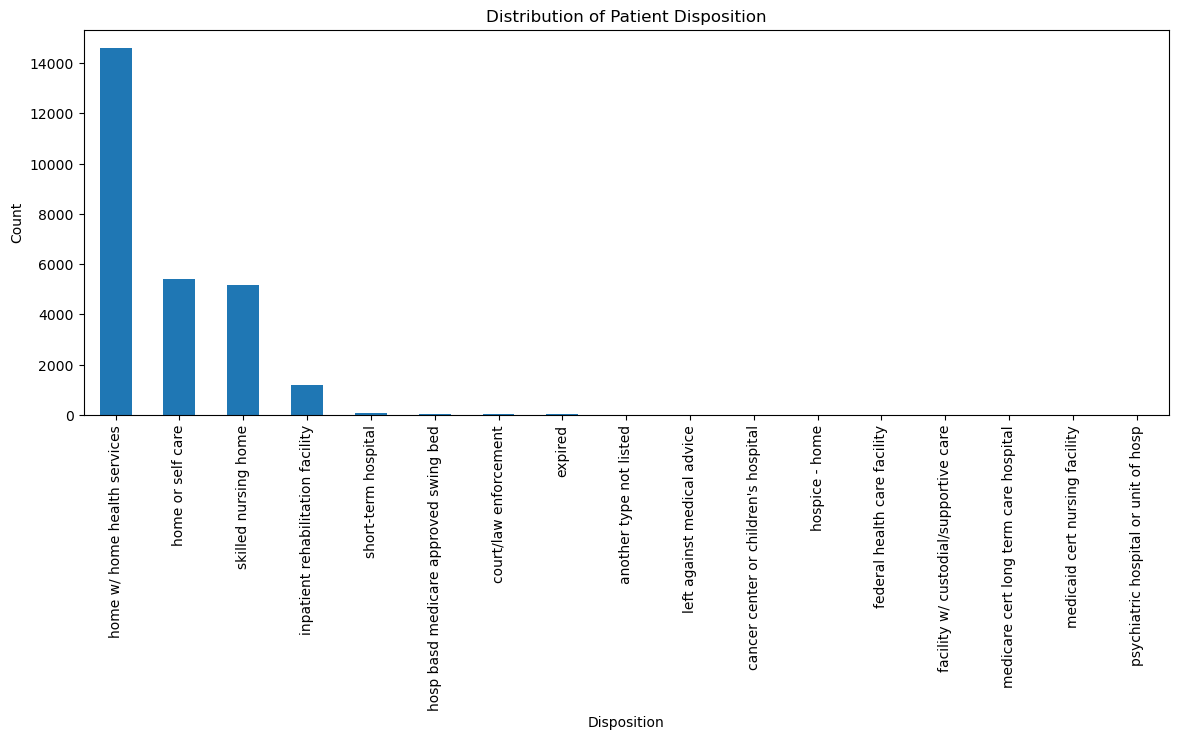

In [16]:
## Patient Disposition Counts

plt.figure(figsize=(14,5))
df["patient_disposition"].value_counts().plot(kind="bar")
plt.title("Distribution of Patient Disposition")
plt.xlabel("Disposition")
plt.ylabel("Count")
plt.show()

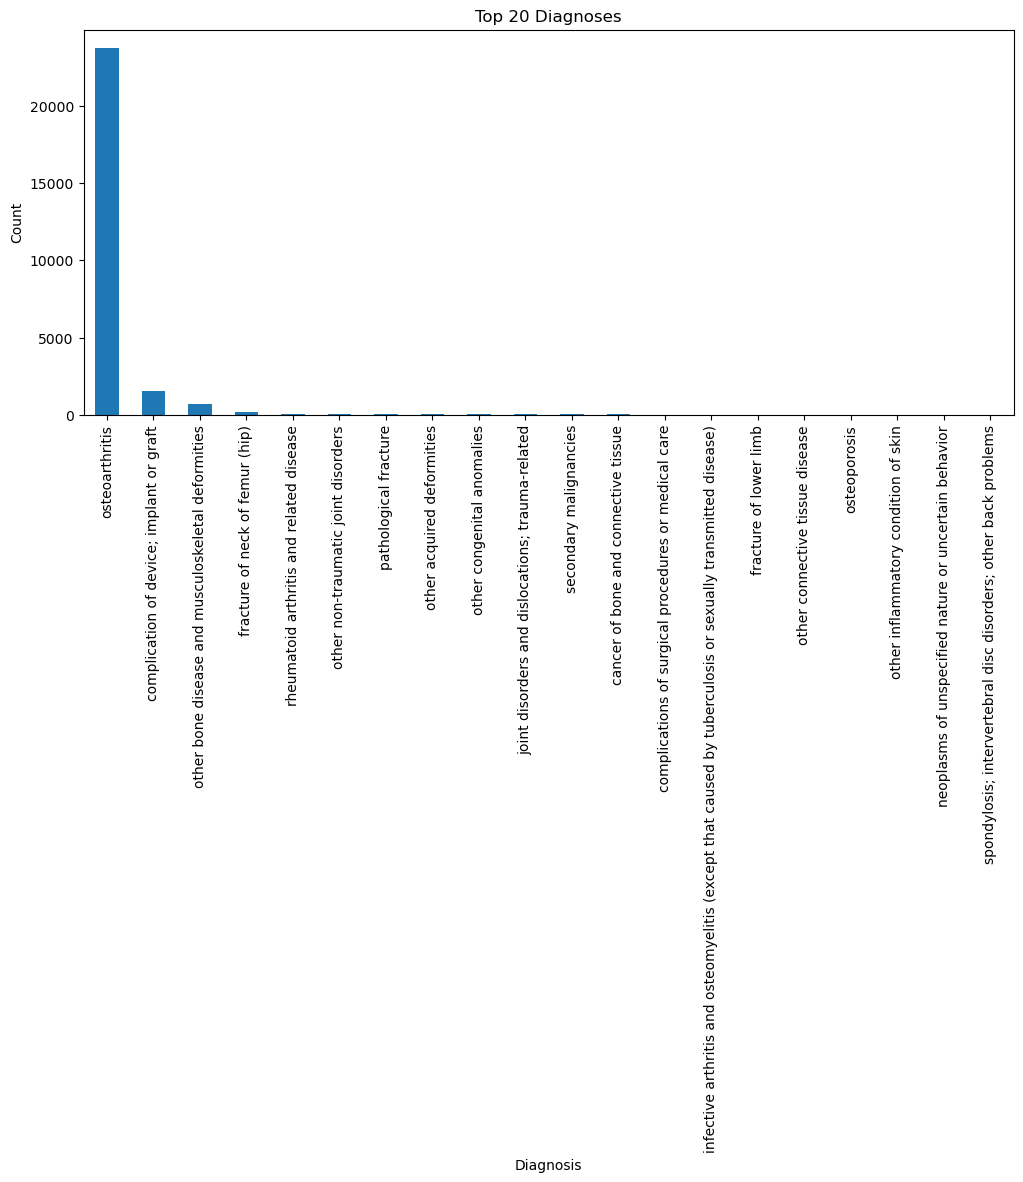

In [17]:
## Top Diagnosis Categories

plt.figure(figsize=(12,5))
df["ccs_diagnosis_description"].value_counts().head(20).plot(kind="bar")
plt.title("Top 20 Diagnoses")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

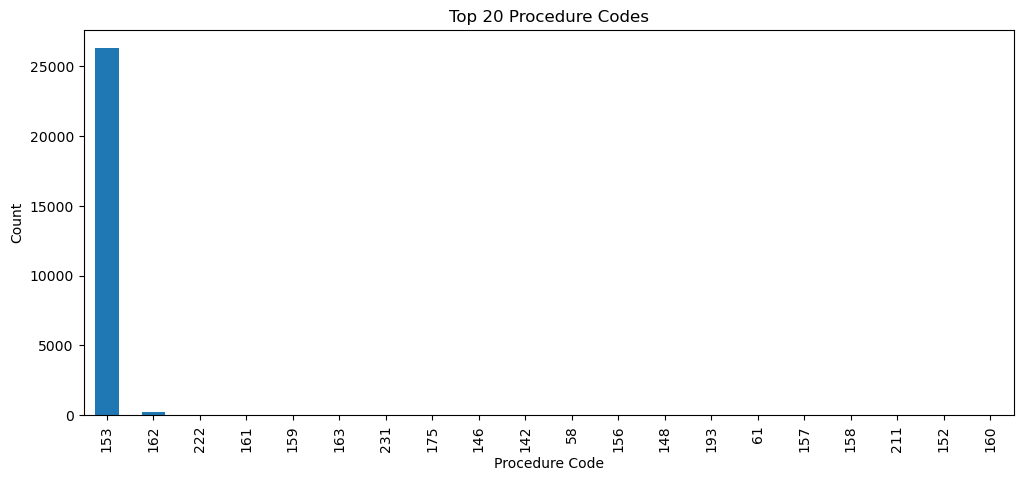

In [18]:
## Top Procedure Codes

plt.figure(figsize=(12,5))
df["ccs_procedure_code"].value_counts().head(20).plot(kind="bar")
plt.title("Top 20 Procedure Codes")
plt.xlabel("Procedure Code")
plt.ylabel("Count")
plt.show()

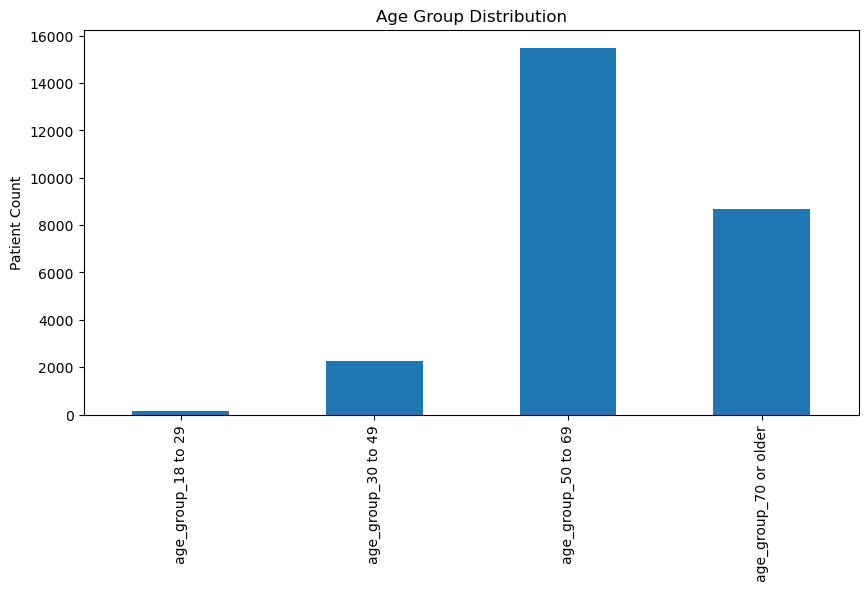

In [19]:
## Age Group Distribution (One-Hot Encoded)

age_cols = [col for col in df.columns if col.startswith("age_group")]

df[age_cols].sum().plot(kind="bar", figsize=(10,5))
plt.title("Age Group Distribution")
plt.ylabel("Patient Count")
plt.show()

#### INSIGHTS – UNIVARIATE ANALYSIS

##### 1. Length of Stay is concentrated between 2–5 days, showing standardized treatment patterns.
##### 2. Most admissions are elective, indicating planned hip replacement procedures.
##### 3. Majority of patients are discharged to home or self-care.
##### 4. Osteoarthritis appears as the dominant diagnosis.
##### 5. Procedure code 153 is the top hip replacement procedure.
##### 6. Age group 50–69 is the highest, meaning hip replacements mostly occur in older adults.

#### Bivariate Analysis (Two Variables)

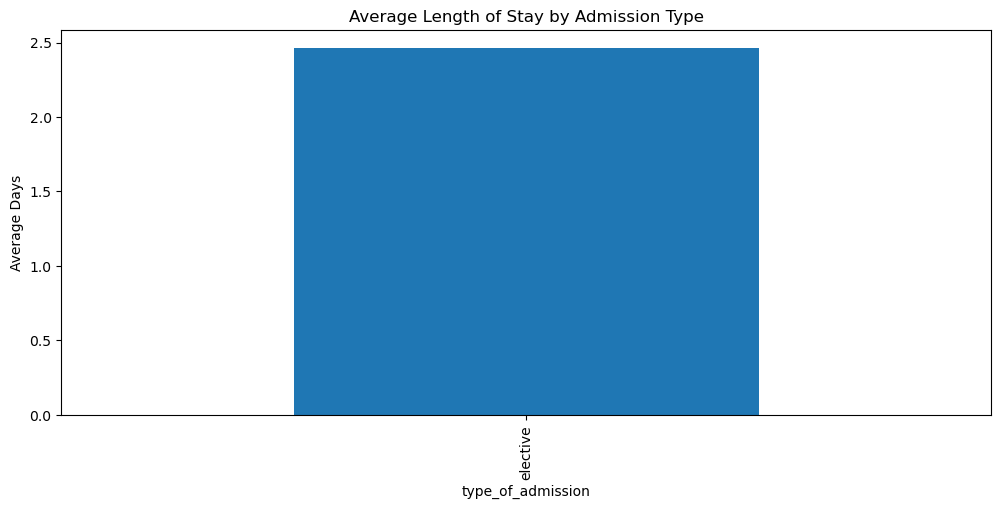

In [20]:
## Length of Stay vs Admission Type

plt.figure(figsize=(12,5))
df.groupby("type_of_admission")["length_of_stay"].mean().sort_values().plot(kind="bar")
plt.title("Average Length of Stay by Admission Type")
plt.ylabel("Average Days")
plt.show()

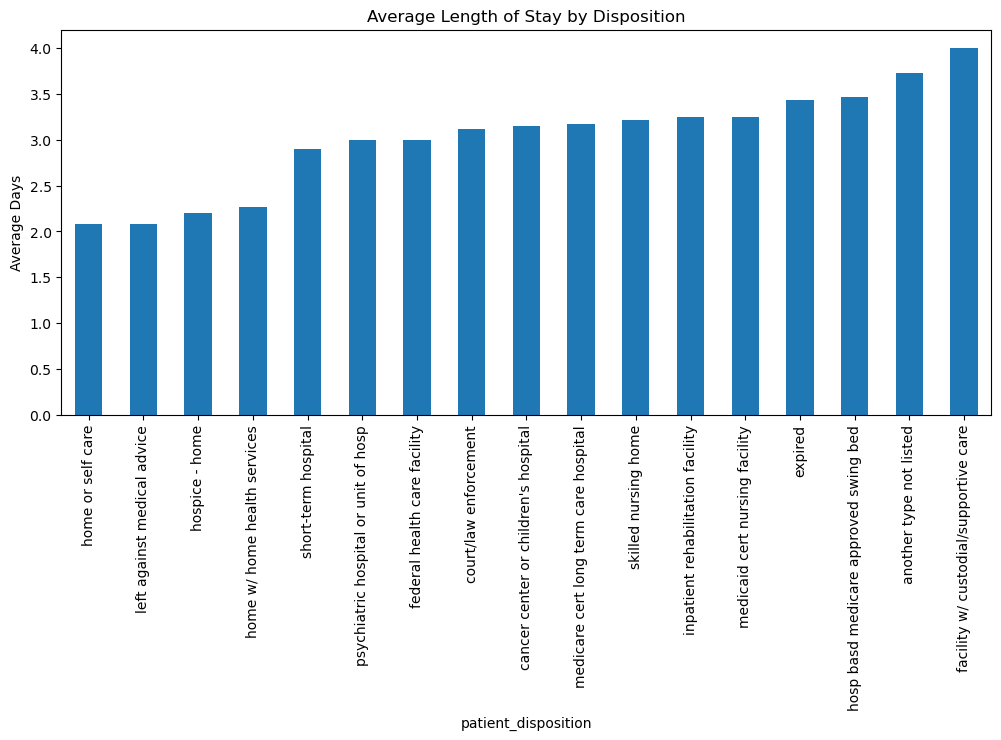

In [21]:
## Length of Stay vs Patient Disposition

plt.figure(figsize=(12,5))
df.groupby("patient_disposition")["length_of_stay"].mean().sort_values().plot(kind="bar")
plt.title("Average Length of Stay by Disposition")
plt.ylabel("Average Days")
plt.show()

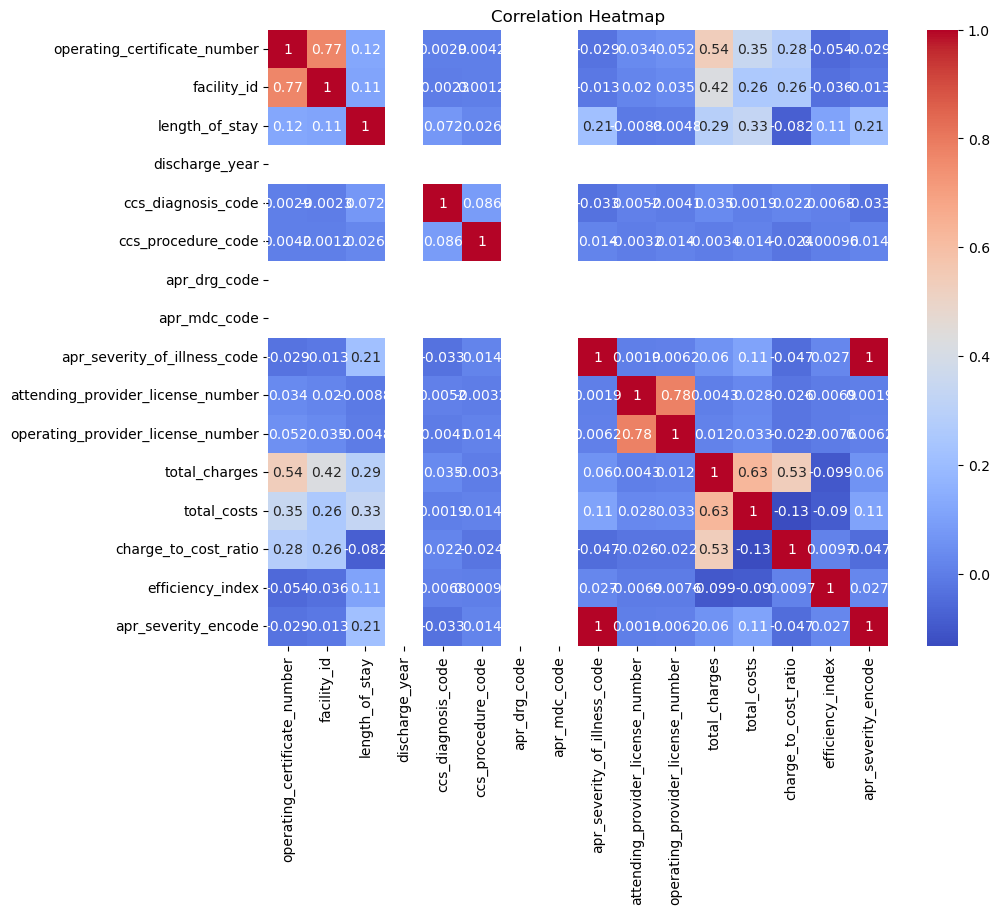

In [22]:
## Correlation Heatmap (Numerical Columns Only)

num_cols = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### INSIGHTS – BIVARIATE ANALYSIS

##### 1. Emergency admissions have longer stays compared to elective admissions.
##### 2. Patients transferred to another facility tend to stay longer.
##### 3. Length of stay has weak correlations with most numerical features, meaning:
#####   - Hospital ID
#####   - Zip code
#####   - Year
#####   do not strongly affect stay duration.

#### MULTIVARIATE ANALYSIS

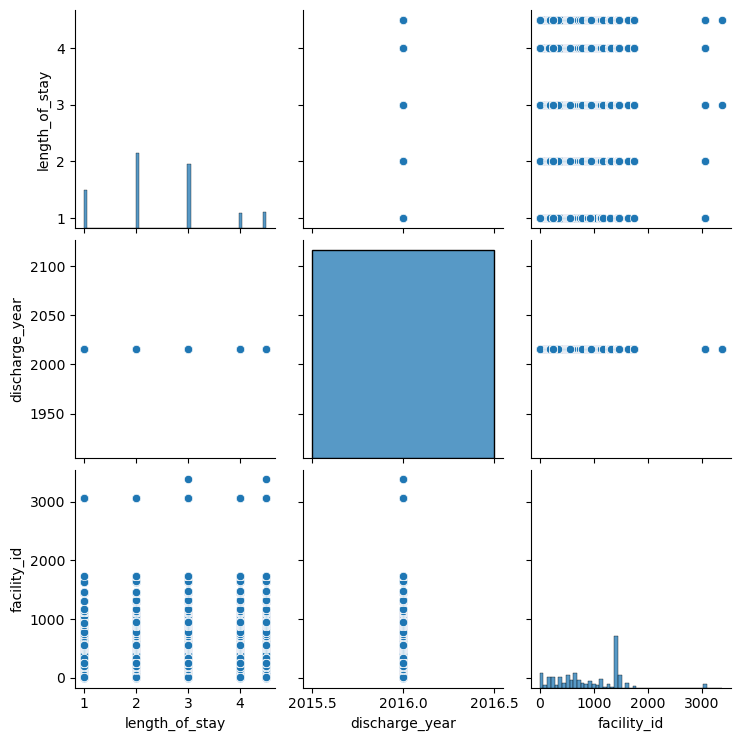

In [23]:
## Pair Plot (Small Subset)

subset = df[["length_of_stay", "discharge_year", "facility_id"]]
sns.pairplot(subset)
plt.show()

In [26]:
## PCA for Dimensionality Reduction (good for report)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical + boolean columns
pca_cols = df.select_dtypes(include=["int64", "float64", "bool"]).fillna(0)

# Standardize
scaler = StandardScaler()
scaled = scaler.fit_transform(pca_cols)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.02596861 0.01642156]


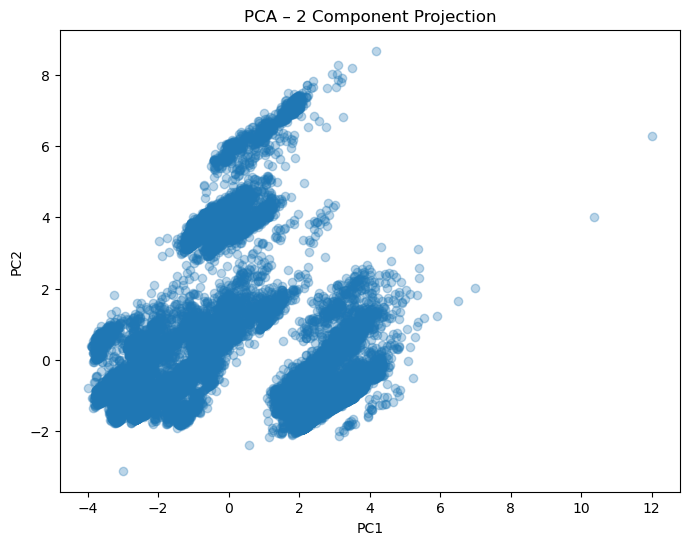

In [27]:
## PCA Scatter Plot

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.3)
plt.title("PCA – 2 Component Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#### INSIGHTS – MULTIVARIATE ANALYSIS

##### Multivariate Insights:

##### 1. PCA shows that most variation in data is explained by age groups + hospital indicators.
##### 2. No single strong cluster exists — meaning patients vary significantly across hospitals.
##### 3. Length of stay does not dominate any PCA component, indicating it's influenced by multiple factors.

### SUMMARY

##### • The dataset shows consistent treatment patterns with most stays between 3–5 days.
##### • Elective admissions dominate hip replacement procedures.
##### • Osteoarthritis is the primary diagnosis behind hip replacements.
##### • Most patients return home after surgery.
##### • Age group 50–69 forms the largest patient segment.
##### • Correlations between features are low, meaning treatment outcomes vary by individual cases.
##### • PCA confirms no single dominant factor — outcomes are multivariate.